In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [3]:
df = pd.read_csv('../data/public_data/public_seoul_cctv_2017.csv', encoding='EUC-KR')
df.head()

,경찰서,개소,대수
0,중부,304,517
1,종로,214,480
2,남대문,159,202
3,서대문,376,"1,131"
4,혜화,215,481


In [7]:
df[['경찰서', '개소']].groupby(['경찰서'], as_index = True).sort_values(by = '개소', ascending = False)

AttributeError: Cannot access callable attribute 'sort_values' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [127]:
# 과제1: 서울시 구별 경찰서수와 CCTV설치수 조사
df.head()

,경찰서,개소,대수
0,중부,304,517
1,종로,214,480
2,남대문,159,202
3,서대문,376,"1,131"
4,혜화,215,481


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
경찰서        32 non-null object
개소         32 non-null object
대수         32 non-null object
총계제외대수     31 non-null object
총계제외개소     31 non-null object
총계제외경찰서    31 non-null object
dtypes: object(6)
memory usage: 1.6+ KB


In [128]:
for n in np.arange(len(df['대수'])):
    df['대수'].values[n] = int(df['대수'].values[n].replace(',', ''))
    df['개소'].values[n] = int(df['개소'].values[n].replace(',', ''))

In [161]:
# 이렇게 하면 col이 index로 들어감
df.set_index('경찰서', inplace=True)           
df.tail()

,개소,대수
경찰서,,
노원,1288,1416
방배,236,830
은평,339,1058
도봉,472,485
수서,677,1856


In [162]:
df = df.drop(31, 0) # == df.drop(df.index[-1])

,개소,대수
경찰서,,
중부,304,517
종로,214,480
남대문,159,202
서대문,376,1131
혜화,215,481
용산,632,1897
성북,453,1276
동대문,486,1396
마포,703,952


In [165]:
df_sort = df.sort_values("대수", ascending=False) # 대수 기준으로 정렬 내림차순
df_sort.head(10)

,개소,대수
경찰서,,
양천,763,2234
용산,632,1897
수서,677,1856
관악,1042,1804
구로,695,1691
강남,596,1612
노원,1288,1416
동대문,486,1396
성북,453,1276


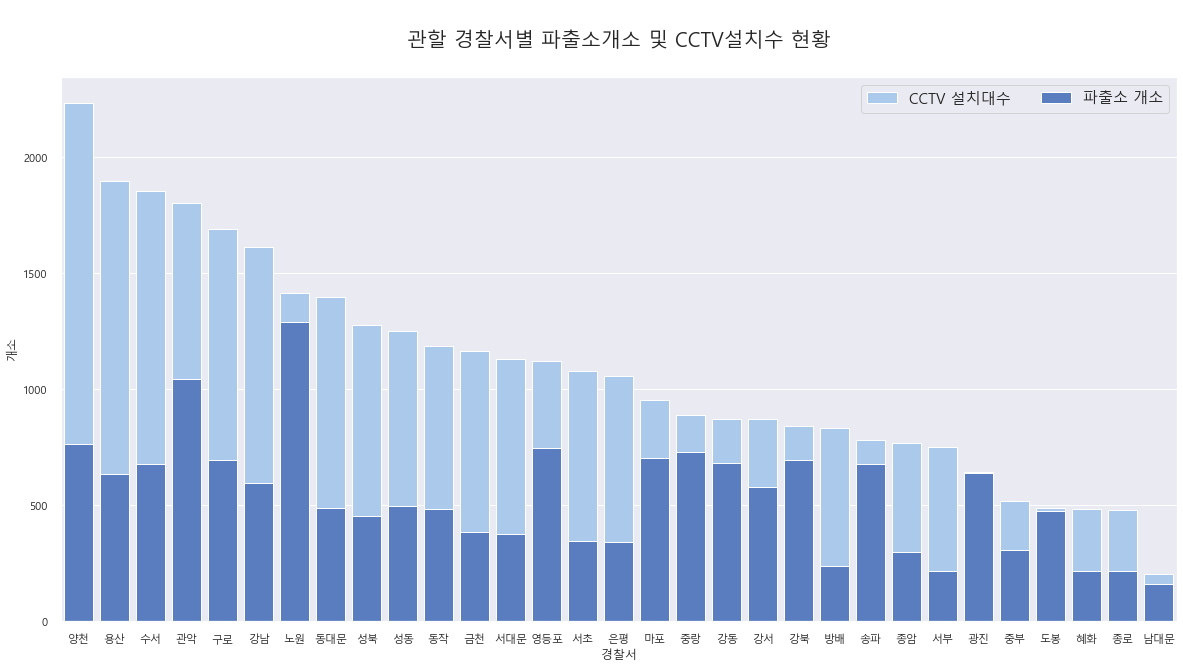

In [170]:
plt.figure(figsize=(20,10))

sns.set_color_codes("pastel")
sns.barplot(x=df_sort.index, y=df_sort['대수'], color="b", label='CCTV 설치대수')

sns.set_color_codes("muted")
sns.barplot(x=df_sort.index, y=df_sort['개소'], color="b", label='파출소 개소')

plt.legend(ncol=2, loc=1, fontsize=15, frameon=True)
plt.title('\n 관할 경찰서별 파출소개소 및 CCTV설치수 현황 \n', fontsize=20)

plt.show()

# seaborn.barplot style : x, y 값을 바꾸면, barh

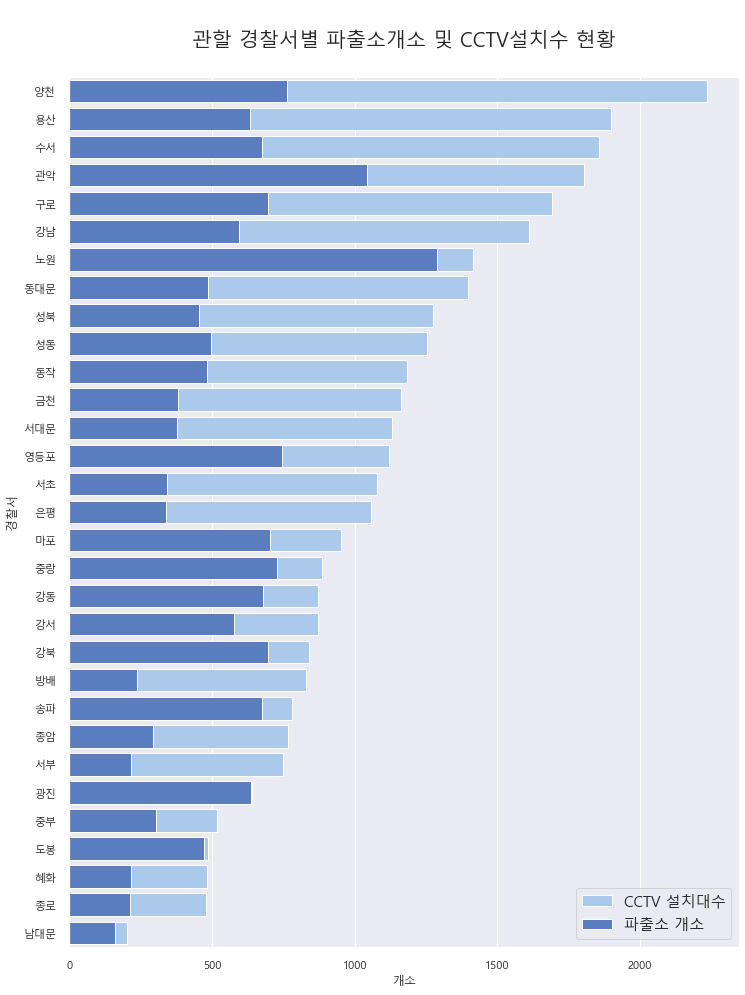

In [171]:
plt.figure(figsize=(12,16))

sns.set_color_codes("pastel")
sns.barplot(x=df_sort['대수'], y=df_sort.index, color="b", label='CCTV 설치대수')

sns.set_color_codes("muted")
sns.barplot(x=df_sort['개소'], y=df_sort.index, color="b", label='파출소 개소')

plt.legend(ncol=1, loc=4, fontsize=15, frameon=True)
plt.title('\n 관할 경찰서별 파출소개소 및 CCTV설치수 현황 \n', fontsize=20)

plt.show()

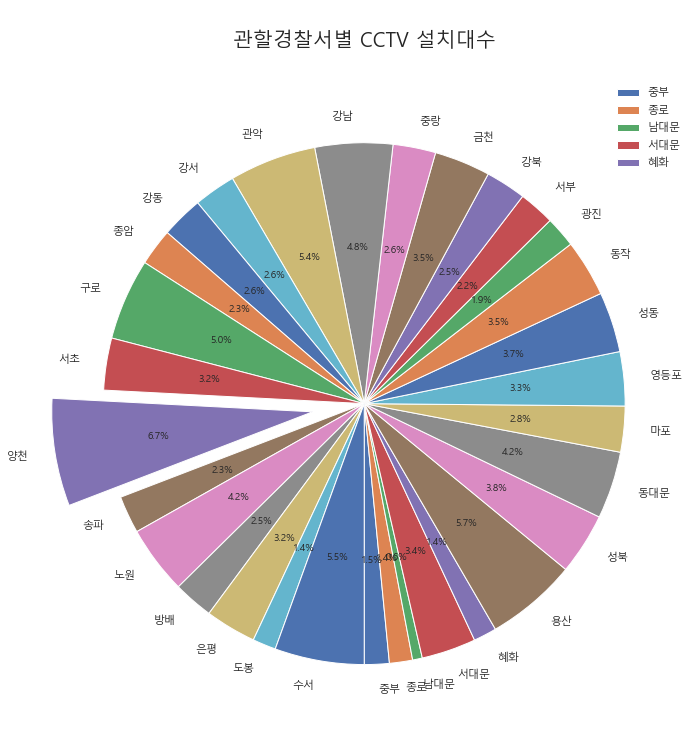

In [172]:
plt.figure(figsize=(12,12))

df_cctv = df['대수']
explode = [ 0.2 if df_cctv[i]==df_cctv.max() else 0 for i in range(len(df_cctv)) ]

plt.pie(df_cctv, 
        explode = explode,
        labels  = df_cctv.index,
        autopct = '%.1f%%', 
        shadow  = False, 
        startangle = 270
       )
plt.legend(df_cctv.index[:5], loc=1) # 다 표기하면 너무 많으니까
plt.title("\n관할경찰서별 CCTV 설치대수\n", fontsize=20)

plt.show()

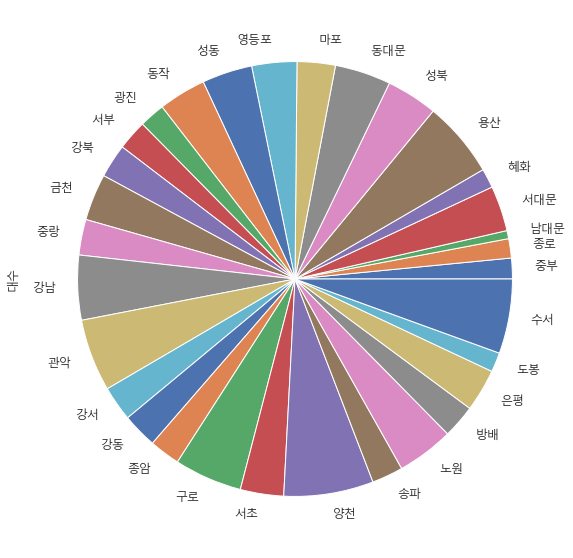

In [174]:
# simple pie chart
df['대수'].plot(kind='pie', fontsize=12, figsize=(10,10));

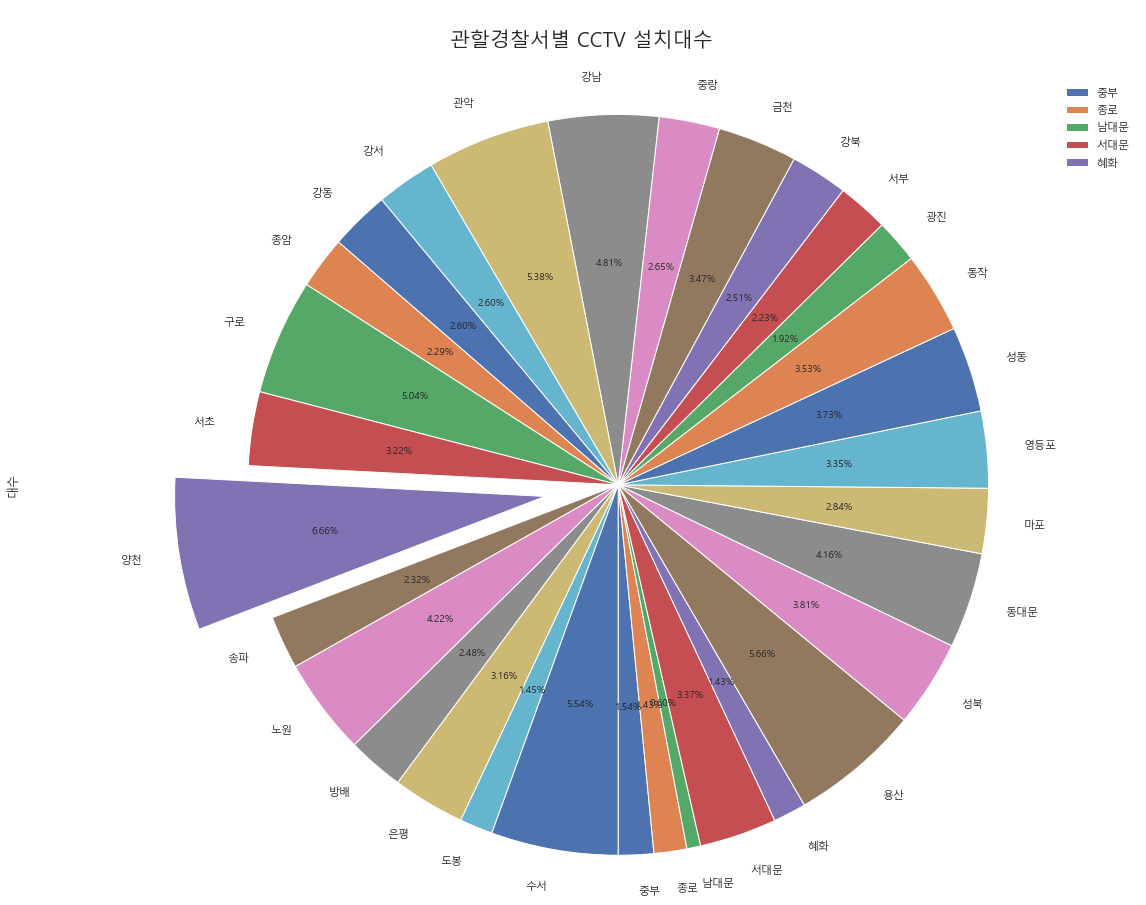

In [175]:
# pandas.plot style : kind=pie, CCTV설치대수

df_cctv = df['대수']
explode = [ 0.2 if df_cctv[i]==df_cctv.max() else 0 for i in range(len(df_cctv)) ]

df_cctv.plot(kind='pie', 
             figsize=(20, 15), 
             autopct='%.2f%%', 
             shadow=False, 
             startangle=-90,
             explode = explode,
            )
plt.axis('equal')
plt.legend(df_cctv.index[:5], loc=1)
plt.title("\n관할경찰서별 CCTV 설치대수\n", fontsize=20)

plt.show()

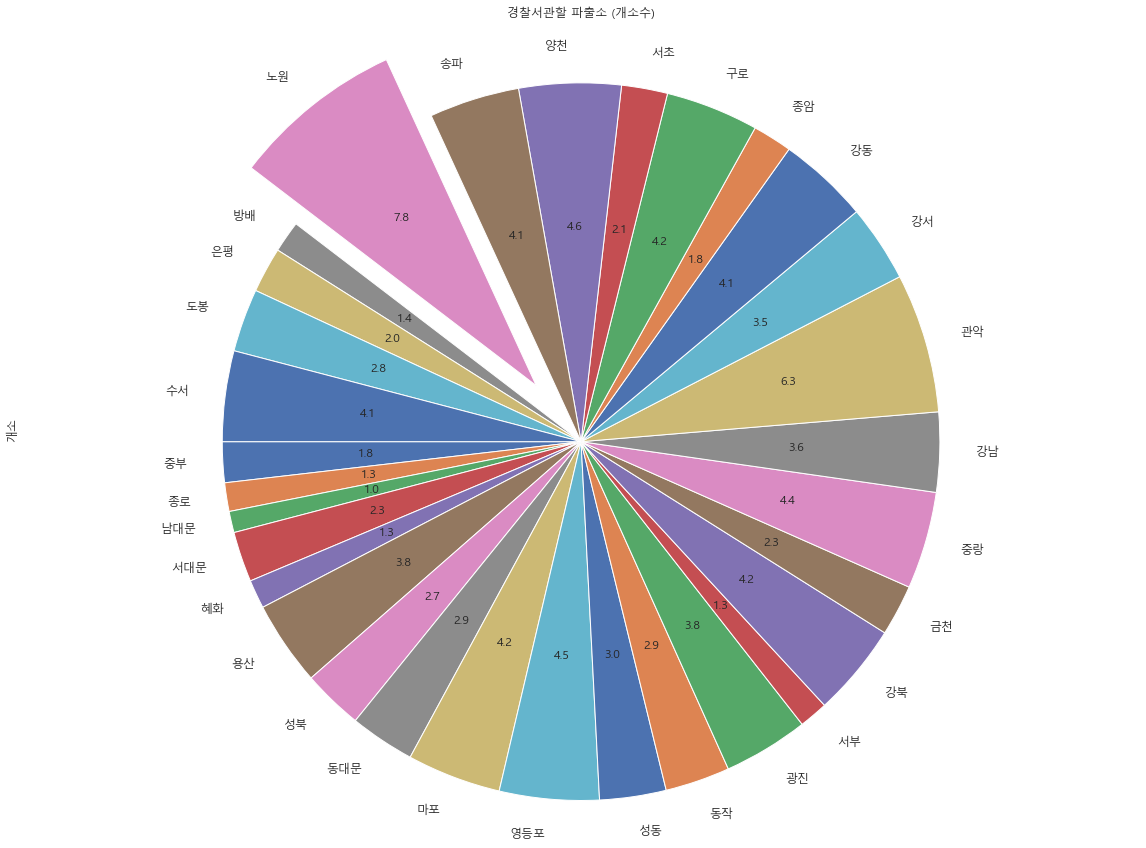

In [176]:
df_pbox = df['개소']
explode = [ 0.2 if df_pbox[i]==df_pbox.max() else 0 for i in range(len(df_pbox)) ]

df_pbox.plot(kind='pie', 
             title='경찰서관할 파출소 (개소수)',
             figsize=(20, 15), 
             fontsize=12, 
             autopct='%1.1f', 
             shadow=False, 
             startangle=180,
             explode = explode,
            )
plt.axis('equal')
plt.show()